# 학습 목표

- 활성화 함수
- 오차역전파
- 손실함수
- 경사하강법

# 활성화 함수

- 이전층의 층의 값을 다음으로 비선형 변환을 해서 전달하는 함수
  - 실제 뉴런의 구조가 비선형으로 동작하기 때문에
  - 경험적으로 비선형 변환을 쓰는 것이 신경망 동작이 더 잘 되었음

- 종류 : sigmoid (입력, 은닉, 출력), tanh, relu (입력, 은닉), softmax (출력) 등  

## sigmoid 함수 만들기

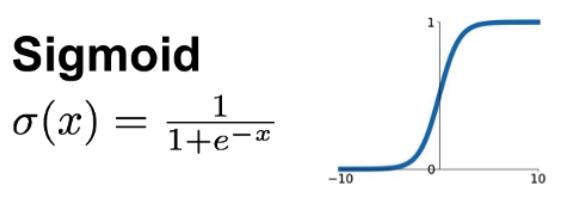

(-0.1, 1.1)

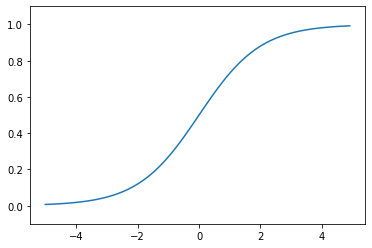

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x) :
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_fun(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)

### sigmoid 미분

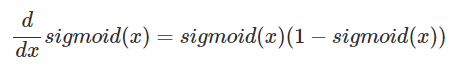

(-0.1, 1.1)

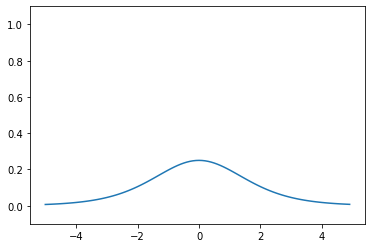

In [ ]:
def d_sigmoid_fun(x) :
  return sigmoid_fun(x) * (1 - sigmoid_fun(x))

x = np.arange(-5.0, 5.0, 0.1)
y = d_sigmoid_fun(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  

# 최대값이 0.25
# 오차역전파 시 활성화함수를 미분해서 곱하는데 층이 많아지면 활성화함수의 곱이 
# 0에 가까워져서 파라미터를 업데이트하지 못하는 문제가 발생
# vanishing gradient (기울기 소실)

## tanh 함수

- sigmoid의 문제점을 해결하기 위한 대안

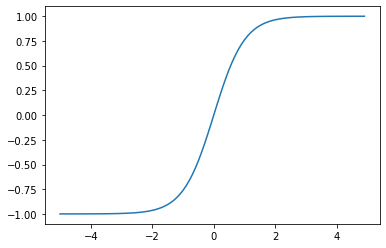

In [ ]:
# tanh 함수
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
# -1부터 1까지의 범위 값을 가진다

### tanh 미분

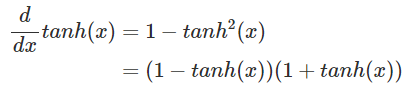

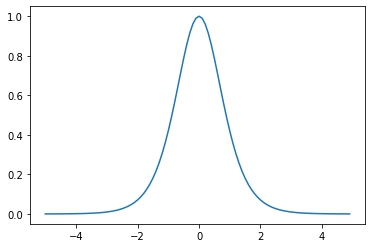

In [ ]:
def d_tanh(x) :
  return 1 - np.tanh(x) * np.tanh(x)

x = np.arange(-5.0, 5.0, 0.1)
y = d_tanh(x)

plt.plot(x, y)

# 최대값이 1이므로 sigmoid에 비해서 더 많이 곱할 수 있음
# 층이 깊어지면 0에 가까워짐

## relu 함수

- 0보다 작으면 0이고 0보다 크면 x인 함수

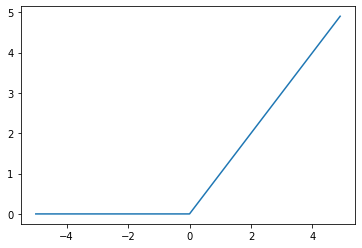

In [ ]:
def relu_fun(x) :
  # 0과 x 중에서 큰 값을 반환
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu_fun(x)

plt.plot(x, y)

## softmax 함수

- 원핫 인코딩된 이진분류나 다진분류의 출력층의 활성화함수로 사용

- 해당 출력들을 확률값으로 변환 (모든 출력의 합은 1이 된다)

# 손실함수(Loss Fuction) : 비용함수
  - 오차를 구하는 함수(공식)

  - 딥러닝의 오차역전파에서 미분 하게되는데 오차나 정확도는 상수라서 미분을 하면 0이 되기때문에 함수형태로 사용
  - 종류: MSE(회귀), CEE(분류)
    - binary_crossentropy : 이진분류
    - catergorical_crossentropy: 다진분류

### 평균제곱오차 (MSE : Mean Squard Error)

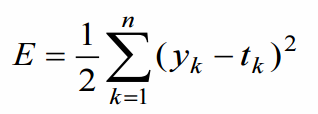



In [1]:
import numpy as np
# y: 예측값
# t: 실제값
# n: 데이터 갯수
def mse_fun(y, t, n):
  return 0.5 * np.sum((y-t)**2)

# 예측값과 실제값이 일치하는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(f"MSE : {mse_fun(y, t, y.size)}")

MSE : 0.09750000000000003


In [2]:
# 예측값과 실제값이 일치하지 않는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(f"MSE : {mse_fun(y, t, y.size)}")

MSE : 0.5975


### 교차엔트로피 오차 (CEE : Cross Entropy Error)
-분류에서 CEE를 사용하는 이유 : 정확도가 사웃이므로 미분하면 0이 되어 오차역전파에 사용할 수 없음

- 분류에서 MSE를 쓰지 못하는 이유
  - MSE는 틀린 것에 더 비중을 두어서 계산 하는 경향(한쪽 측면만 보고 계산) -> 2개 이상의 클래스를 판단하는 분류에서는 쓰기가 힘듬
  - 활성화 함수가 softmax를 쓰는 경우 mse를 같이 쓰는 경우
  미분하면 output * (1 - output) 값이 포함 -> 출력이 1이나 0에 가까워지면 w, b를 갱신한 값이 0에 가까워져서 학습이 안되는 문제가 발생

  - CEE를 쓰면 2가지 문제가 해결됨

  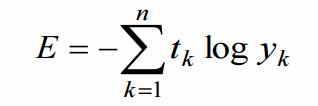


In [4]:
def cee_fun(y, t, n):
  # 1e-7 : log(0) 이 무한대가 되므로 0이 되지 않도록 하기 위해서 아주 작은 값을 더해줌
  return -np.sum(t*np.log(y + 1e-7))

# 예측값과 실제값이 일치하는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(f"CEE : {cee_fun(y, t, y.size)}")

CEE : 0.510825457099338


In [5]:
# 예측값과 실제값이 일치하지 않는 경우
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(f"CEE : {cee_fun(y, t, y.size)}")

CEE : 2.302584092994546


# 오차역전파
- 오차와 파라미터의 비를 구해서 기존의 파라미터 값을 갱신하는 방법 (갱신은 오차가 감소하는 경우에만 갱신 -> 경사하강법)

## 오차역전파 알고리즘

- (1) 파라미터 (w, b)를 초기화 (랜덤)
- (2) 특성데이터(X)를 입력해서 예측값 y를 계산
- (3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
- (4) 오차/파라미터의 비를 계산 (기울기, 미분)
- (5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신)
  - 학습률을 쓰는 이유 : 값이 너무 크게 변하는 것을 방지
- (6) (2)-(5)까지를 epochs만큼 반복

In [7]:
from numpy.random.mtrand import wald
import numpy as np

# 특성데이터, 라벨데이터, 반복수, 학습률
def fit_fun(X, y, epoch, lr):
  #(1) 파라미터 (w, b)를 초기화 (랜덤)
  w = np.random.randn(1)
  b = np.random.randn(1)
  print(f"초기 파라미터 : w({w}), b({b})")
  #  (6) (2)-(5)까지를 epochs만큼 반복
  for i in range(epoch):
    #(2) 특성데이터(X)를 입력해서 예측값 y를 계산
    pred_y = w * X + b

    #(3) 예측값 y와 실제값 yt의 차이를 계산 -> 오차 (e)
    e = y - pred_y
    #(4) 오차/파라미터의 비를 계산 (기울기, 미분)
    dw = e / w
    db = e / b

    #(5) 기존의 파라미터에 계산한 비를 더해주어 갱신 (단, 학습률만큼만 갱신)
    w = w + lr * dw
    b = b + lr * db

    print(f"반복수 : {i}, 예측값 : {pred_y}, 오차 : {e}")
    print(f"갱신된 파라미터 : w({w}), b({b})")

### 1층으로 구성된 신경망 학습모델

In [8]:
fit_fun(1, 3, 100, 0.01)

초기 파라미터 : w([-0.25307034]), b([-0.42817317])
반복수 : 0, 예측값 : [-0.68124351], 오차 : [3.68124351]
갱신된 파라미터 : w([-0.39853359]), b([-0.51414875])
반복수 : 1, 예측값 : [-0.91268234], 오차 : [3.91268234]
갱신된 파라미터 : w([-0.49671057]), b([-0.59024895])
반복수 : 2, 예측값 : [-1.08695952], 오차 : [4.08695952]
갱신된 파라미터 : w([-0.57899107]), b([-0.65949023])
반복수 : 3, 예측값 : [-1.23848131], 오차 : [4.23848131]
갱신된 파라미터 : w([-0.65219568]), b([-0.72375929])
반복수 : 4, 예측값 : [-1.37595497], 오차 : [4.37595497]
갱신된 파라미터 : w([-0.71929141]), b([-0.78422076])
반복수 : 5, 예측값 : [-1.50351217], 오차 : [4.50351217]
갱신된 파라미터 : w([-0.78190181]), b([-0.84164734])
반복수 : 6, 예측값 : [-1.62354916], 오차 : [4.62354916]
갱신된 파라미터 : w([-0.84103391]), b([-0.89658186])
반복수 : 7, 예측값 : [-1.73761577], 오차 : [4.73761577]
갱신된 파라미터 : w([-0.89736476]), b([-0.94942272])
반복수 : 8, 예측값 : [-1.84678748], 오차 : [4.84678748]
갱신된 파라미터 : w([-0.9513761]), b([-1.00047256])
반복수 : 9, 예측값 : [-1.95184866], 오차 : [4.95184866]
갱신된 파라미터 : w([-1.00342543]), b([-1.04996766])
반복수 : 10, 예측값 : 

### 2층으로 구성된 신경망 학습모델

In [13]:
def fit_fun2(X,y,epoch, lr):
  # (1) 파라미터 초기화
  w1 = np.random.randn(1)
  w2 = np.random.randn(1)
  b1 = np.random.randn(1)
  b2 = np.random.randn(1)

  # (6) (2) - (5)까지 반복
  for i in range(epoch):
    # (2) 1층 출력 계산
    pred_y1 = w1 * X + b1
    pred_y2 = w2 * pred_y1 + b2

    # (3) 오차계산- 2층부터 계산
    e2 = y- pred_y2

    # (4) 2층에 대한 오차 역전파
    # 기울기
    dw2 = e2 / w2
    db2 = e2 / b2

    # 파라미터 갱신
    w2 = w2 + lr *dw2
    b2 = b2 + lr *db2

    # (5) 1층에 대한 오차 역전파
    # 기울기
    dw1 = pred_y1 * dw2 /w1
    db1 = pred_y1 * db2/ b1

    # 파라미터 갱신
    w1 = w1 + lr*dw1
    b1 = b1 + lr*db1

    print(f"반복수 : {i}, 예측값: {pred_y2}, 오차 : {e2}")

In [14]:
fit_fun(1, 3, 100, 0.01)

초기 파라미터 : w([0.20573531]), b([0.14630247])
반복수 : 0, 예측값 : [0.35203778], 오차 : [2.64796222]
갱신된 파라미터 : w([0.33444254]), b([0.32729478])
반복수 : 1, 예측값 : [0.66173732], 오차 : [2.33826268]
갱신된 파라미터 : w([0.40435777]), b([0.39873688])
반복수 : 2, 예측값 : [0.80309465], 오차 : [2.19690535]
갱신된 파라미터 : w([0.4586885]), b([0.4538335])
반복수 : 3, 예측값 : [0.912522], 오차 : [2.087478]
갱신된 파라미터 : w([0.50419821]), b([0.49983006])
반복수 : 4, 예측값 : [1.00402827], 오차 : [1.99597173]
갱신된 파라미터 : w([0.54378526]), b([0.53976307])
반복수 : 5, 예측값 : [1.08354832], 오차 : [1.91645168]
갱신된 파라미터 : w([0.57902806]), b([0.57526849])
반복수 : 6, 예측값 : [1.15429655], 오차 : [1.84570345]
갱신된 파라미터 : w([0.61090395]), b([0.6073527])
반복수 : 7, 예측값 : [1.21825665], 오차 : [1.78174335]
갱신된 파라미터 : w([0.64006964]), b([0.63668892])
반복수 : 8, 예측값 : [1.27675856], 오차 : [1.72324144]
갱신된 파라미터 : w([0.66699235]), b([0.6637546])
반복수 : 9, 예측값 : [1.33074695], 오차 : [1.66925305]
갱신된 파라미터 : w([0.69201892]), b([0.68890324])
반복수 : 10, 예측값 : [1.38092217], 오차 : [1.61907783]
갱신된 파라미